In [1]:
import pandas as pd
import os
import numpy as np
from numpy import column_stack
from pandas import read_csv

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mode
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

# Base de datos reducida

In [3]:
print('Leyendo el archivo csv')
dataframe1 = pd.read_csv("D:\\csv\\UNSW_NB15_training-set.csv")

Leyendo el archivo csv


## Clasificacion binaria

In [4]:
df = dataframe1.drop(['id'], axis = 1)
# df = df.drop(['attack_cat'], axis = 1)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()

Label distribution Training set:
1    119341
0     56000
Name: label, dtype: int64



In [6]:
print('Label distribution Training set:')
print(df['attack_cat'].value_counts())
print()

Label distribution Training set:
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64



In [7]:
print('Entrenamiento:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("La Variable '{col_name}' tiene {unique_cat} categorias".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribucion de las categorias proto:')
print(df['proto'].value_counts().sort_values(ascending=False).head())

print('Distribucion de las categorias state:')
print(df['state'].value_counts().sort_values(ascending=False).head())

print('Distribucion de las categorias service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

# La importancia de saber las categorias, es para conocer cuantas variables adicionales se agregaran
# al momento de transformalas en numericas

Entrenamiento:
La Variable 'proto' tiene 133 categorias
La Variable 'service' tiene 13 categorias
La Variable 'state' tiene 9 categorias
La Variable 'attack_cat' tiene 10 categorias

Distribucion de las categorias proto:
tcp     79946
udp     63283
unas    12084
arp      2859
ospf     2595
Name: proto, dtype: int64
Distribucion de las categorias state:
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
Name: state, dtype: int64
Distribucion de las categorias service:
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
Name: service, dtype: int64


In [8]:
Attack= df[df['label'] == 1]
NonAttack = df[df['label'] == 0]
classes = pd.value_counts(df['label'], sort = True)
output=df['label']

Text(0, 0.5, 'Frecuencia')

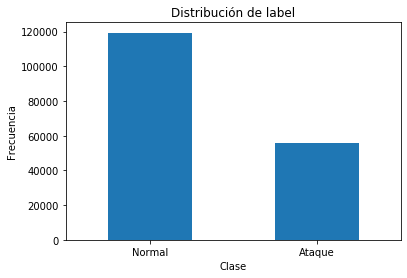

In [9]:
labels = ['Normal','Ataque']
classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de label")
plt.xticks(range(2), labels)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")

In [10]:
tipos = pd.value_counts(dataframe1['attack_cat'], sort = True)
tipos

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

Text(0, 0.5, 'Frecuencia')

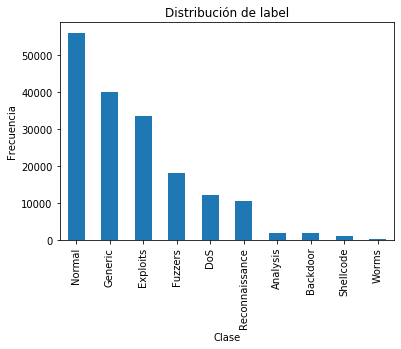

In [75]:
label = ['Normal','Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis', 'Backdoor','Shellcode','Worms']
tipos.plot(kind = 'bar', rot=0)
plt.title("Distribución de label")
plt.xticks(range(10), label)
plt.xticks(rotation=90)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")

In [40]:
normal  = dataframe1[dataframe1['attack_cat'] == 'Normal']
normalmean = normal['sbytes'].mean()

generic  = dataframe1[dataframe1['attack_cat'] == 'Generic']
genericmean = generic['sbytes'].mean()

Exploits  = dataframe1[dataframe1['attack_cat'] == 'Exploits']
exploitsmean = Exploits['sbytes'].mean()

fuzzers  = dataframe1[dataframe1['attack_cat'] == 'Fuzzers']
fuzzersmean = fuzzers['sbytes'].mean() 

dos  = dataframe1[dataframe1['attack_cat'] == 'DoS']
dosmean = dos['sbytes'].mean()

recon  = dataframe1[dataframe1['attack_cat'] == 'Reconnaissance']
reconmean = recon['sbytes'].mean()

analysis  = dataframe1[dataframe1['attack_cat'] == 'Analysis']
analysismean = analysis['sbytes'].mean()

backdoor  = dataframe1[dataframe1['attack_cat'] == 'Backdoor']
backdoormean = backdoor['sbytes'].mean()

shellcode  = dataframe1[dataframe1['attack_cat'] == 'Shellcode']
shellcodemean = shellcode['sbytes'].mean()

worms  = dataframe1[dataframe1['attack_cat'] == 'Worms']
wormsmean = worms['sbytes'].mean()

mean = (normalmean, genericmean, exploitsmean, fuzzersmean, dosmean, reconmean, analysismean, backdoormean, shellcodemean, wormsmean)
meanpd = pd.DataFrame(list(mean))

Text(0, 0.5, 'Frecuencia')

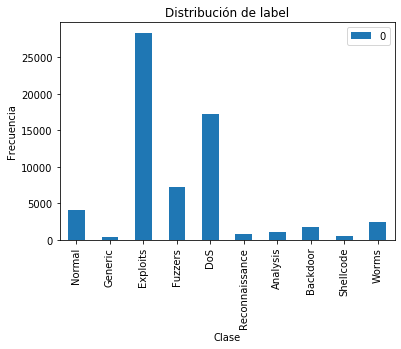

In [74]:
label = ['Normal','Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis', 'Backdoor','Shellcode','Worms']
meanpd.plot(kind = 'bar', rot=0)
plt.title("Distribución de label")
plt.xticks(range(10), label)
plt.xticks(rotation=90)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")

In [44]:
normal  = dataframe1[dataframe1['attack_cat'] == 'Normal']
normalmean = normal['smeansz'].mean()

generic  = dataframe1[dataframe1['attack_cat'] == 'Generic']
genericmean = generic['smeansz'].mean()

Exploits  = dataframe1[dataframe1['attack_cat'] == 'Exploits']
exploitsmean = Exploits['smeansz'].mean()

fuzzers  = dataframe1[dataframe1['attack_cat'] == 'Fuzzers']
fuzzersmean = fuzzers['smeansz'].mean() 

dos  = dataframe1[dataframe1['attack_cat'] == 'DoS']
dosmean = dos['smeansz'].mean()

recon  = dataframe1[dataframe1['attack_cat'] == 'Reconnaissance']
reconmean = recon['smeansz'].mean()

analysis  = dataframe1[dataframe1['attack_cat'] == 'Analysis']
analysismean = analysis['smeansz'].mean()

backdoor  = dataframe1[dataframe1['attack_cat'] == 'Backdoor']
backdoormean = backdoor['smeansz'].mean()

shellcode  = dataframe1[dataframe1['attack_cat'] == 'Shellcode']
shellcodemean = shellcode['smeansz'].mean()

worms  = dataframe1[dataframe1['attack_cat'] == 'Worms']
wormsmean = worms['smeansz'].mean()

smeansz = (normalmean, genericmean, exploitsmean, fuzzersmean, dosmean, reconmean, analysismean, backdoormean, shellcodemean, wormsmean)
smeansz = pd.DataFrame(list(smeansz))

KeyError: 'smeansz'

In [ ]:
corr = df.corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
df = df.drop(['attack_cat'], axis = 1)

# Transformar en numerica las variables categoricas

In [46]:
Y = df.label
X = df.drop(columns=['label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [48]:
X = pd.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


# XGBoost

In [49]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=test_size, random_state=seed)

In [12]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 95.81%


# XGBoost K-fold cross validation

In [50]:
model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv = kfold)

KeyboardInterrupt: 

In [ ]:
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

In [ ]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("AUC: %.2f%%" % (roc * 100.0))


# XGBoost stratified KFolds

In [51]:
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)

In [52]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 92.80% (6.23%)


In [61]:
from joblib import dump
from joblib import load
dump(model, "xgb1.joblib.dat")

['xgb1.joblib.dat']

In [64]:
loaded_model = load("xgb1.joblib.dat")
print("Loaded model from: xgb1.joblib.dat")

Loaded model from: xgb1.joblib.dat


## Clasificacion Multi

In [35]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
num_cat = le.fit_transform(dataframe1.attack_cat)
print(le.classes_)
print(np.unique(num_cat))

['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']
[0 1 2 3 4 5 6 7 8 9]


In [36]:
Y=num_cat.tolist()
X = dataframe1.drop(columns=['id','attack_cat','label']) #去除无关变量
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [37]:
X = pandas.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [38]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=test_size, random_state=seed)

In [34]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 83.63%


In [39]:
model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv = kfold)

In [41]:
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

In [43]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("AUC: %.2f%%" % (roc * 100.0))

Accuracy: 83.34% (0.28%)
AUC: 94.66%


# SVM

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
roc = roc_auc_score(y_test, predictions)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Matriz de confusion: %.2f%%" % (accuracy))
print("AUC: %.2f%%" % (roc * 100.0))